In [32]:
exec(open('initNotebook.py').read())
del sys.modules['phd_helper']
import phd_helper

# h1 Load Data

In [34]:
wCubeAlD6D8 = read_csv('../../FESR/configurations/2019/wCubeAlphaD6D8/fits.csv')
wCubeAlD6D8D10 = read_csv('../../FESR/configurations/2019/wCubeAlphaD6D8D10/fits.csv')
wCubeD6D8 = read_csv('../../FESR/configurations/2019/wCubeD6D8/fits.csv')
wCubeD6D8D10 = read_csv('../../FESR/configurations/2019/wCubeD6D8D10/fits.csv')
phd_helper.dfToLatex(wCubeAlD6D8,['alpha', 'c6', 'c8'])

'0.3261(21)0.3261(21)0.3261(21) & 1.17 \\\\0.3265(19)0.3265(19)0.3265(19) & 1.25 \\\\0.3264(21)0.3264(21)0.3264(21) & 1.46 \\\\0.3243(27)0.3243(27)0.3243(27) & 0.54 \\\\0.3250(27)0.3250(27)0.3250(27) & 0.55 \\\\0.3256(30)0.3256(30)0.3256(30) & 0.65 \\\\0.3280(36)0.3280(36)0.3280(36) & 0.35 \\\\0.3325(65)0.3325(65)0.3325(65) & 0.0 \\\\'

# WCube: (1-x)^3(1+3x)

## Plots with free Alpha

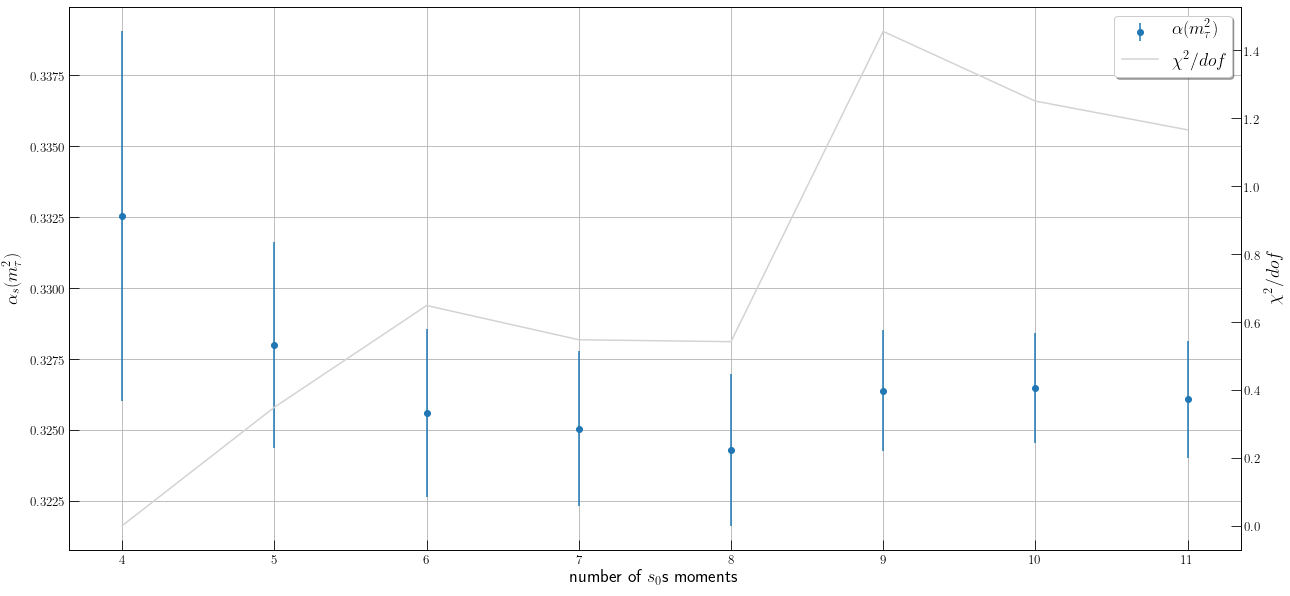

In [38]:
data = wCubeAlD6D8
s0s = list(map(lambda smin: sminMap[smin], data.index))

plt.errorbar(s0s,data['alpha'],yerr=data['alphaErr'],fmt='.',marker='o',label=r'$\alpha(m_\tau^2)$')
ax = plt.gca()
lines, labels = ax.get_legend_handles_labels()
twinx = ax.twinx()
twinx.plot(s0s, data['chiDof'],color='lightgrey',label=r'$\chi^2/dof$')
twinx.grid(False)
lines2, labels2 = twinx.get_legend_handles_labels()

ax.set_xlabel(r'number of $s_0$s moments')
twinx.set_ylabel(r'$\chi^2/dof$')
ax.set_ylabel(r'$\alpha_s(m_\tau^2)$')
plt.legend(lines+lines2, labels+labels2)
plt.savefig('./plots/fitWCubeAlpha.png',dpi=300)


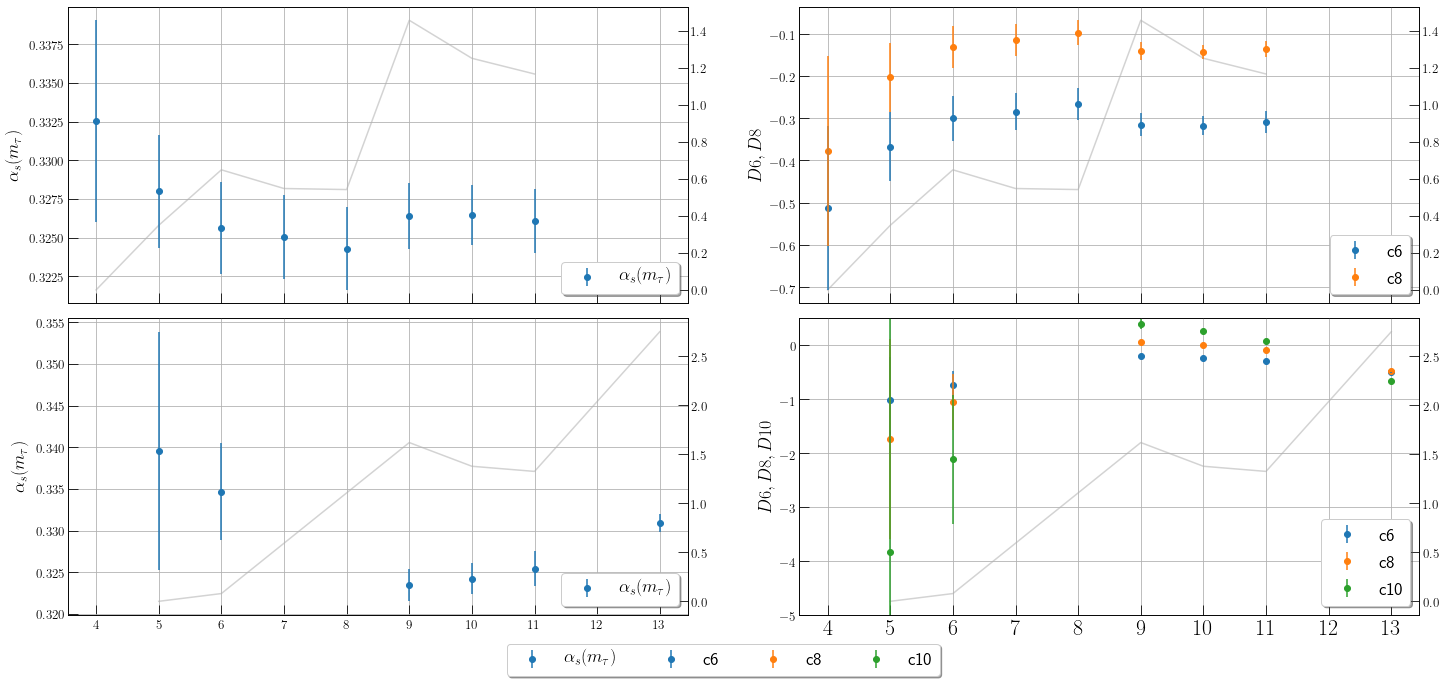

In [34]:
fig, (axes) = plt.subplots(2, 2, sharex=True)
# fig.suptitle(r'Fit of $\omega_{Cube}$ with free $\alpha_s$ and two setups of OPE using FOPT.')
plt.xticks(list(sminMap.values()), fontsize=22)
addAx(axes[0], 0, ['alpha'], wCubeAlD6D8, ylabel=r'$\alpha_s(m_\tau)$')
addAx(axes[1], 0, ['alpha'], wCubeAlD6D8D10, ylabel=r'$\alpha_s(m_\tau)$')

addAx(axes[0], 1, ['c6', 'c8'], wCubeAlD6D8, ylabel='$D6, D8$')
addAx(axes[1], 1, ['c6', 'c8', 'c10'], wCubeAlD6D8D10, ylabel=r'$D6, D8, D10$', ylim=(-5,0.5))


# legend outside lower center
fig.subplots_adjust(bottom=0.1)
lines, labels = axes[0][0].get_legend_handles_labels()
lines2, labels2 = axes[1][1].get_legend_handles_labels()
fig.legend(lines+lines2, labels+labels2, loc="lower center", ncol=4)
fig.tight_layout(pad=4)
fig.subplots_adjust(hspace=0.05, bottom=0.1)
fig.savefig('./plots/wCubeAlpha.png',dpi=300)
plt.show()

We present two setups of the OPE fit. In the first one (first row of the plot) we left $\alpha_s, c_6$ and $c_8$ as free parameters. In the second one (second row of the plot) we added $c_{10}$ as free parameter. We noticed that more free parameters for our fits causes problems with their convergence. This is noted in missing data points and that the maximum moments we were able to fit decreased to 13.
The best values for the first setup with a $\chi^2/dof=1.17$ are: $\alpha_s(m_\tau)=0.3261(21), c_6=-0.319(27)$ and $c_8=-0.14(18)$ ($s_{min}=1.9GeV^2, 11  s_0s$-moments).
The best values for the second setup with a $\chi^2/dof=1.32$ are: $\alpha(m_\tau)=0.3254(21), c_6=-0.287(20), c_8=-0.10(21)$ and $c_{10}=-0.069(52)$ ($s_{min}=1.9GeV^2, 11  s_0s$-moments).
We notice a similiar behavior to fits with the kinematic weight $\omega_\tau$: The $\alpha_s$ vary within the error range, but has less variation. The OPE coefficients are still very correlated and approach each other for increasing fitted $s_0s$-moments for fits including the $c_{10}$ parameter. One notices that the smaller the values for the OPE coefficients, the smaller their errors. This needs to be caused by the error calculation of MINUIT, which seems to be proportional to the size of the fitted variable value. The $\chi^2/dof$ increases with increasing fitted $s_0s$-moments to values bigger than 1, which indicate that fits with more than 11 moments don´t pass the \textit{chi-square test for goodness of fit}.

## Test OPE convergence

In [12]:
# print(testOPESeriesForConvergence(wCubeAlD6D8))
print(testOPESeriesForConvergence(wCubeAlD6D8D10,upToDim=10))

eVal = '%e' %wCubeAlD6D8['del^(10)']
print(eVal.partition('-'))
errZeroes = int(eVal.partition('-')[2])-1

abs(wCubeAlD6D8D10['del^(8)']) - abs(wCubeAlD6D8['del^(10)'])


smin1800    True
smin1900    True
smin1950    True
smin2000    True
smin2300    True
smin2400    True
dtype: bool


TypeError: cannot convert the series to <class 'float'>

The OPE converges for all fits.

## Plots with fixed Alpha

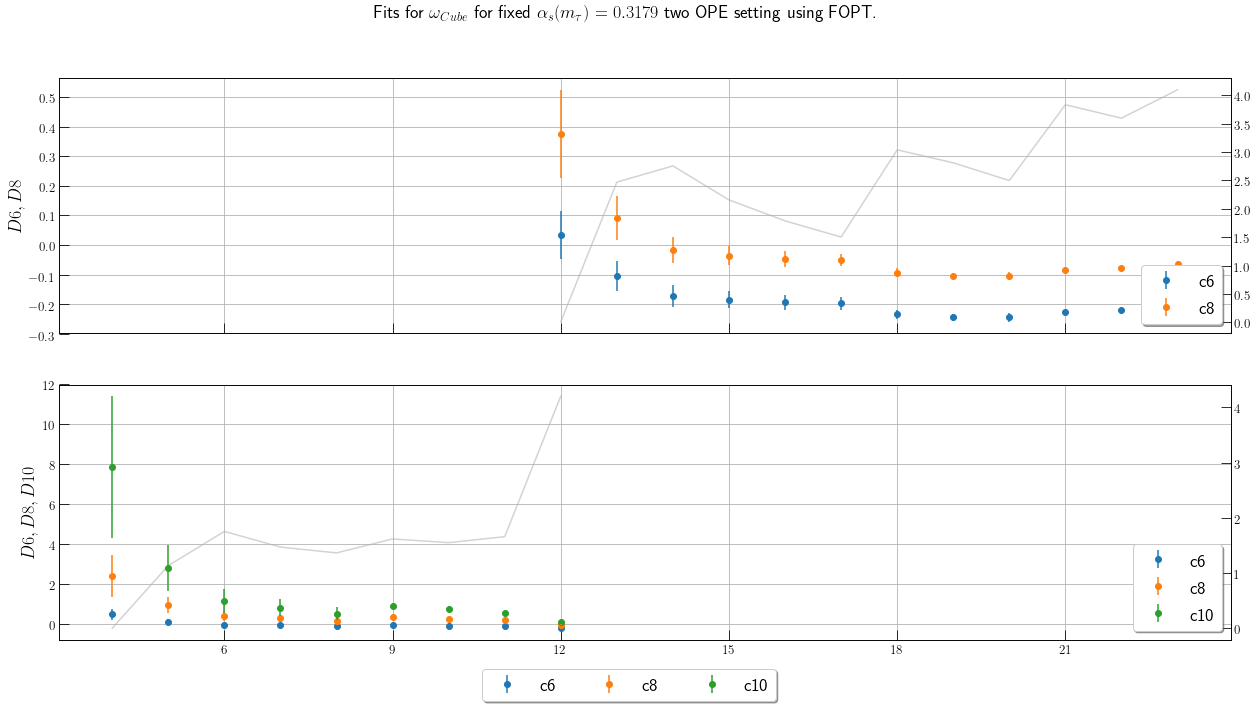

In [8]:
fig, (axes) = plt.subplots(2, 1, sharex=True)
plt.xticks(list(sminMap.values()))
fig.suptitle(r'Fits for $\omega_{Cube}$ for fixed $\alpha_s(m_\tau)=0.3179$ two OPE setting using FOPT.')

addAx(axes, 0, ['c6', 'c8'], wCubeD6D8, ylabel=r'$D6, D8$')
addAx(axes, 1, ['c6', 'c8', 'c10'], wCubeD6D8D10, ylabel=r'$D6, D8, D10$')

# legend outside lower center
fig.subplots_adjust(bottom=0.1)
lines, labels = axes[1].get_legend_handles_labels()
fig.legend(lines, labels, loc="lower center", ncol=4)

fig.savefig('./plots/wCubeFixedAlpha.png', dpi=300)
plt.show()

We compare two OPE setups for a fixed $\alpha_s=0.3179$. In the upper row of the plot we fit the parameters $c_6$ and $c_8$. In the lower row we fit the parameters $c_6, c_8$ and $c_{10}$. We notice that fits up to twelve moments did not converge for the former setup. Conversly for the latter, all fits with more than twelve $s_0s$-moments did not converge. This might be caused by values of the three OPE parameters $c_6, c_8$ and $c_{10}$ close to zero, which causes problems with the double precision of our fitting routine.
The best values for the first row fits with $\chi^2/dof=1.50$ are $c_6=-0.196(21)$ and $c_8=-0.051(21)$ ($s_{min}=1.65GeV^2, 17 s_0s$-moments).
The best values for the second row fits with $\chi^2/dof=1.14$ are $c_6=0.13(13), c_8=0.95(40)$ and $c_{10}=2.8(1.2)$ ($s_{min}=2.4GeV^2, 24 s_0s$-moments).
Including $c_6$ and $c_8$ as fitting variables shows comparable values and behaviors to the previous plot with $\omega_{cube}$, but also to $\omega_{kinematic}$, whereas including $c_{10}$ increases the values of $c_{6}$ and $c_{8}$. In addition $c_{10} \approx 3$ is several times bigger than all previous contributions to e$c_6$ or $c_8$, which makes the fits with $c_{10}$ questionable. We have seen that excluding the 10th dimensions OPE contribution $\alpha_s^{c_6, c_8}$ have in general lower values than including the 10th dimension contribution $\alpha_{s}^{c_6, c_8, c_{10}}$. Consequently, to account for the bigger $\alpha_s^{c_6, c_8, c_{10}}$ values, we should also expect lower values in $c_6, c_8$ and $c_{10}$ for the second row fits, which is not the case. In favor of fits of including $c_{10}$ contribution is the nice $\chi^2/dof$ plateau for the $s_0s$-moments 5-11 and the corresponding values of $c_6, c_8$ and $c_{10}$, which are rather constant.

## Test for OPE convergence

In [7]:
print(testOPESeriesForConvergence(wCubeD6D8))
print(testOPESeriesForConvergence(wCubeD6D8D10))

smin15      True
smin1525    True
smin155     True
smin1575    True
smin16      True
smin1625    True
smin165     True
smin1675    True
smin17      True
smin175     True
smin18      True
smin185     True
dtype: bool
smin185    True
smin19     True
smin195    True
smin20     True
smin21     True
smin22     True
smin23     True
smin24     True
smin26     True
dtype: bool


In [ ]:
The OPE converges for all fits.